### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="Fig1 The Combined E commerce Dataset.png" align="left" width="400"/>



 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [1]:
# Load the data file and display the DataFrame:
import pandas as pd
df = pd.read_csv('The E-commerce Dataset.csv')
print ('The current DataFrame: ',"\n", df.head(5))
print ('------------------------------------')

# Set display width
pd.set_option('display.width', 1000)

# As the missing values in column "review" are denoted as 'none', we will replace them with Null values directly into the current DataFrame:
df['review'].replace('none', pd.NA, inplace=True)

# Count number of Null values in each column:
print ('Number of Null values in each column: ', "\n", df.isna().sum())

print ('------------------------------------')
# The length of the DataFrame before removing the missing data aka Null values:
print ('The length of the DataFrame before removing the missing data: ', len(df))

# Remove records with missing data in [render/rating/helpfulness and review] columns, then save the cleaned DataFrame into a new DataFrame:
df_cleaned = df.dropna(subset = ['gender', 'rating', 'helpfulness', 'review'])
# The length of the DataFrame after removing the missing data aka Null values:
print ('The length of the DataFrame after removing the missing data: ', len(df_cleaned))


The current DataFrame:  
    userId  timestamp                           review                  item  \
0    4051      12807        Great job for what it is!                  eBay   
1    4052     122899      Free Access Worth your Time               NetZero   
2      33      12700    AOL..I love you!!!!!!!!!!!!    AOL (America Online)   
3      33      21000     EBAY!!!  I LOVE YOU!!!! :-)*                  eBay   
4      33      22300  Blair Witch...Oh Come On.......   Blair Witch Project   

   rating  helpfulness gender                  category  item_id  item_price  \
0     5.0          2.0      F  Online Stores & Services       88      149.00   
1     5.0          0.0      F  Online Stores & Services       46       53.00   
2     5.0          4.0      F  Online Stores & Services        0      145.84   
3     5.0          4.0      F  Online Stores & Services       88      149.00   
4     1.0          4.0      F                    Movies       12       44.00   

   user_city  
0  

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


##### Q2.1 Total number of unique users, unique reviews, unique items, and unique categories

In [2]:
# Task: Total number of unique users, unique reviews, unique items, and unique categories in the given data:
print ('Total number of unique users, unique reviews, unique items, and unique categories in the given data: ')
## Using the nunique() method to count the number of unique values in each column  
                                                                # by specifying the column name as an argument to the nunique() method:
unique_users = df_cleaned['userId'].nunique()
print (f'Unique users: {unique_users}')

unique_reviews = df_cleaned['review'].nunique()
print(f'Unique reviews: {unique_reviews}')

unique_items = df_cleaned['item'].nunique()
print(f'Unique items: {unique_items}')

unique_categories = df_cleaned['category'].nunique()
print(f'Unique categories: {unique_categories}')


Total number of unique users, unique reviews, unique items, and unique categories in the given data: 
Unique users: 8562
Unique reviews: 19459
Unique items: 89
Unique categories: 9


##### Q2.2 Descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records

In [3]:
# Task: Descriptive statistics: the total number, mean, std, min and max regarding all rating records, etc
print ('Descriptive statistics of rating records, including the total number, mean, std, min and max: ')
print ('Total number of rating records: ', df_cleaned['rating'].count())
print ('Mean of rating records: ', df_cleaned['rating'].mean())
print ('Standard deviation of rating records: ', df_cleaned['rating'].std())
print ('Minimum rating: ', df_cleaned['rating'].min())
print ('Maximum rating: ', df_cleaned['rating'].max())

Descriptive statistics of rating records, including the total number, mean, std, min and max: 
Total number of rating records:  19916
Mean of rating records:  3.7017975497087767
Standard deviation of rating records:  1.4044507218710944
Minimum rating:  1.0
Maximum rating:  5.0


##### Q2.3 Descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders

In [4]:
# Task: Descriptive statistics: mean, std, max, and min of the number of items rated by different genders

## Group by gender and count the number of items rated by each gender
print ('Number of items rated by different genders: ')
gender_item_counts = df_cleaned.groupby('gender')['item'].count()                   # Group by gender and count the number of items
df_gender_item_counts = gender_item_counts.reset_index ()                           # Convert the resulting Series to a DataFrame using the reset_index() method
df_gender_item_counts.columns = ['Gender', 'Count']                                 # Rename the columns of the resulting DataFrame
print (df_gender_item_counts.to_string(index=False))

print ('------------------------------------')

## Descriptive statistics of the number of items rated by different genders
print ('Descriptive statistics of the number of items rated by different genders: ')
mean_items = gender_item_counts.mean()
std_items = gender_item_counts.std()
max_items = gender_item_counts.max()
min_items = gender_item_counts.min()

print ('Mean: ', round(mean_items, 3))
print ('Standard deviation: ', round(std_items, 3))
print ('Maximum: ', round(max_items, 3))
print ('Minimum: ', round(min_items, 3))


Number of items rated by different genders: 
Gender  Count
     F   9793
     M  10123
------------------------------------
Descriptive statistics of the number of items rated by different genders: 
Mean:  9958.0
Standard deviation:  233.345
Maximum:  10123
Minimum:  9793


##### Q2.4 Descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items

In [5]:
# Task: Descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items

## Group by item and count the number of ratings received by each item
print ('Number of ratings received by each item: ')
item_rating_counts = df_cleaned.groupby('item')['rating'].count()
df_item_rating_counts = item_rating_counts.reset_index()
df_item_rating_counts.columns = ['Item', 'Count']
print (df_item_rating_counts.to_string(index=False))

print ('------------------------------------')

## Descriptive statistics of the number of ratings that received by each items
print ('Descriptive statistics of the number of ratings that received by each items, including mean, std, max and min: ')

mean_item_ratings = item_rating_counts.mean()
std_item_ratings = item_rating_counts.std()
max_item_ratings = item_rating_counts.max()
min_item_ratings = item_rating_counts.min()

print ('Mean: ', round(mean_item_ratings, 3))
print ('Standard deviation: ', round(std_item_ratings, 3))
print ('Maximum: ', round(max_item_ratings, 3))
print ('Minimum: ', round(min_item_ratings, 3))

Number of ratings received by each item: 
                                                 Item  Count
                                 AOL (America Online)    939
                                        All Advantage    657
                                Alta Vista (by 1stUp)    157
                                           Amazon.com    240
                                    American Airlines    185
                                      American Beauty    280
                                         American Pie    315
                                     Any Given Sunday    166
                                           Applebee's    141
                Austin Powers: The Spy Who Shagged Me    239
                                      Bank of America    203
                                 Being John Malkovich    162
                                  Blair Witch Project    339
                            Blue Mountain Arts eCards    284
                                         Bl

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

##### Q3.1 Box Plot of Ratings by Gender

In [6]:
# Convert 'rating' column to numeric
df_cleaned_sub = df_cleaned.copy()
df_cleaned_sub['rating'] = pd.to_numeric(df_cleaned_sub['rating'], errors='coerce')

# Create a pivot table with count of ratings
pivot_table_count = df_cleaned_sub.pivot_table(index='rating', columns='gender', aggfunc='size', fill_value=0)

# Create pivot tables with average, median, min, and max ratings
pivot_table_mean = df_cleaned_sub.pivot_table(columns='gender', values='rating', aggfunc='mean').round(2)
pivot_table_median = df_cleaned_sub.pivot_table(columns='gender', values='rating', aggfunc='median').round(2)
pivot_table_min = df_cleaned_sub.pivot_table(columns='gender', values='rating', aggfunc='min').round(2)
pivot_table_max = df_cleaned_sub.pivot_table(columns='gender', values='rating', aggfunc='max').round(2)

# Combine the statistics into one DataFrame
stats_gender_df = pd.concat([pivot_table_mean, pivot_table_median, pivot_table_min, pivot_table_max], keys=['Mean', 'Median', 'Min', 'Max'])

print("Count of ratings by gender:")
print(pivot_table_count)

print("\nStatistics of Ratings by Gender:")
print(stats_gender_df)

Count of ratings by gender:
gender     F     M
rating            
1.0     1146  1263
2.0     1077  1135
3.0     1200  1206
4.0     2345  2426
5.0     4025  4093

Statistics of Ratings by Gender:
gender            F     M
Mean   rating  3.72  3.69
Median rating  4.00  4.00
Min    rating  1.00  1.00
Max    rating  5.00  5.00


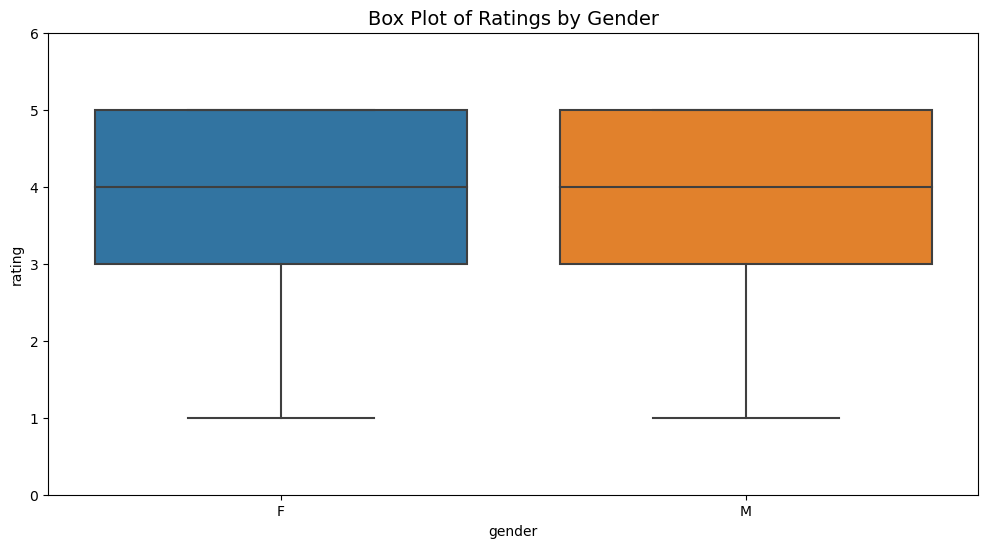

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for gender vs ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='rating', data=df_cleaned)
plt.title('Box Plot of Ratings by Gender', fontsize = 14)
plt.ylim(0, 6) # Adjust the y-axis to range from 0 to 6
plt.show()



<div style="font-family: Times New Roman;">

<h4 style="text-align:center">Box Plot of Ratings by Gender</h4>

<p>The box plot above represents the distribution of ratings given by each gender.</p>

The box plot shows that the male group tends to have a slightly higher number of ratings compared to the female group. However, the <b><span style="color:orange"> median rating (4.0) </span></b> and the <b><span style="color:red"> maximum rating (5.0) </span></b> share the same values, suggesting that the central tendency and the highest ratings are similar for both groups. Also, in the additional pivot table data above, we can see the mean rating score by females (3.72) is a bit higher than the mean rating by males (3.69).

</div>

##### Q3.2 Box Plot of Ratings by Helpfulness

In [8]:
# Convert 'rating' and 'helpfulness' columns to numeric
df_cleaned_sub = df_cleaned.copy()
df_cleaned_sub['rating'] = pd.to_numeric(df_cleaned_sub['rating'], errors='coerce')
df_cleaned_sub['helpfulness'] = pd.to_numeric(df_cleaned_sub['helpfulness'], errors='coerce')

# Create pivot tables with average, median values of rating for each helpfulness 
pivot_table_helpfulness_mean = df_cleaned_sub.pivot_table(index='helpfulness', values='rating', aggfunc='mean').round(2)
pivot_table_helpfulness_median = df_cleaned_sub.pivot_table(index='helpfulness', values='rating', aggfunc='median').round(2)

# Combine the statistics into one DataFrame
stats_helpfulness_df = pd.concat([pivot_table_helpfulness_mean, pivot_table_helpfulness_median], keys=['Mean', 'Median'])

print("\nStatistics of Ratings by Helpfulness:\n")
print(stats_helpfulness_df)

print ('------------------------------------------------------------------------------------------------------------')

# Create pivot table with 'rating' as the index, 'helpfulness' as the columns, and count as the values
rating_helpfulness_count = df_cleaned_sub.pivot_table(index='rating', columns='helpfulness', aggfunc='size', fill_value=0)

# Add total by columns
rating_helpfulness_count.loc['Total', :] = rating_helpfulness_count.sum(axis=0)

# Add total by rows
rating_helpfulness_count.loc[:, 'Total'] = rating_helpfulness_count.sum(axis=1)

# Convert the DataFrame to integers
rating_helpfulness_count = rating_helpfulness_count.astype(int)

print("\nCount of each Helpfulness for each Rating:\n")
print(rating_helpfulness_count)


Statistics of Ratings by Helpfulness:

                    rating
       helpfulness        
Mean   0.0            3.70
       1.0            3.77
       2.0            3.55
       3.0            3.75
       4.0            3.69
Median 0.0            4.00
       1.0            4.00
       2.0            4.00
       3.0            4.00
       4.0            4.00
------------------------------------------------------------------------------------------------------------

Count of each Helpfulness for each Rating:

helpfulness   0.0  1.0  2.0   3.0    4.0  Total
rating                                         
1.0           711   31   37   429   1201   2409
2.0           678    6   19   350   1159   2212
3.0           709   18   15   353   1311   2406
4.0          1411   38   37   794   2491   4771
5.0          2401   83   79  1495   4060   8118
Total        5910  176  187  3421  10222  19916


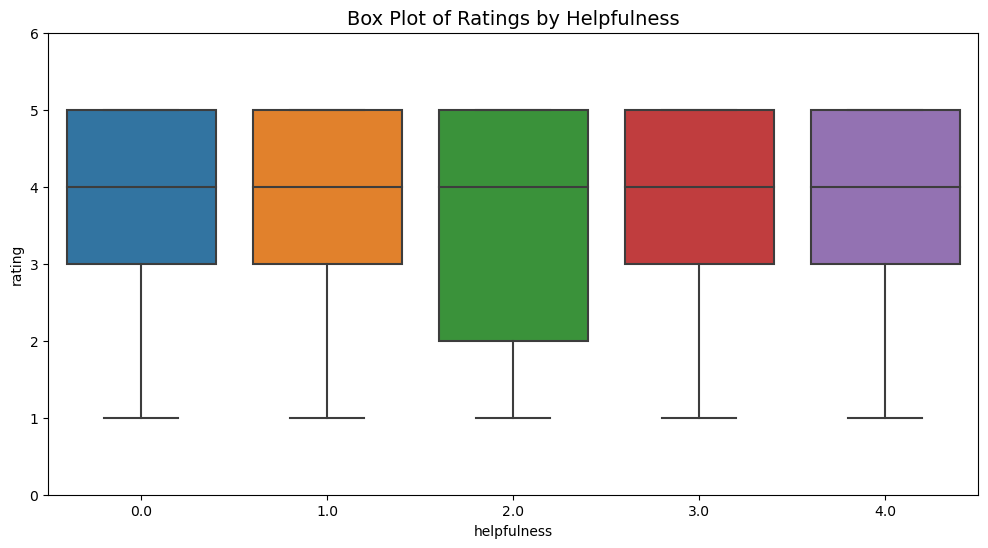

In [9]:
# Boxplot for helpfulness vs ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='helpfulness', y='rating', data=df_cleaned, orient = 'v')
plt.title('Box Plot of Ratings by Helpfulness', fontsize = 14)
plt.ylim(0, 6) # Adjust the y-axis to range from 0 to 6
plt.show()


<div style="font-family: Times New Roman;">

<h4 style="text-align:center">Box Plot of Ratings by Gender</h4>

<p>The box plot and data show a generally positive correlation between the average helpfulness of ratings and the actual ratings given by users. Higher average helpfulness levels tend to correspond with higher ratings received. However, this positive trend is only relatively evident in the increase in "mean'' ratings as helpfulness increases from 2.0 to 4.0. 

However, the data points for an average helpfulness of 0.0 or 1.0 are likely to be outliers, with an unexpectedly high "median" rating of 4.0. Rather than being viewed as obviously "unhelpful," this probably represents ratings that have not yet gotten any helpfulness ratings from other users.

The relationship is not perfectly linear across all data points. There are fluctuations in the data, for example, a significant number of high ratings at low average helpfulness or low ratings at high helpfulness. This suggests that while a positive correlation generally holds between the average perceived helpfulness and ratings, it is not absolute in every case. In other words, there are other factors that are likely to impact individual users' rating behaviors beyond just the average helpfulness assessment.
</p>



</div>

##### Q3.3 Box Plot of Ratings by Category

In [10]:
# Create pivot table with 'category' as the index, 'rating' as the columns, and count as the values
rating_category_count = df_cleaned.pivot_table(index='category', columns='rating', aggfunc='size', fill_value=0)

# Add total by rows
rating_category_count['Total'] = rating_category_count.sum(axis=1)

# Convert the DataFrame to integers
rating_category_count = rating_category_count.astype(int)

print("\nCount of each Rating for each Category with totals:\n")
print(rating_category_count)

print ('------------------------------------------------------------------------------------------------------------')

# Summarize information of Ratings by Category
summary = df_cleaned.groupby('category')['rating'].describe()
print("\nSummary of Ratings by Category:")
print(summary)


Count of each Rating for each Category with totals:

rating                    1.0  2.0  3.0   4.0   5.0  Total
category                                                  
Books                       1    3    6    33   163    206
Games                      19   76  101   379   955   1530
Hotels & Travel           197  157  170   361   477   1362
Kids & Family             179  159  115   211   583   1247
Media                     182  150   84    99   120    635
Movies                    462  716  931  1879  3060   7048
Online Stores & Services  948  651  646  1191  1853   5289
Personal Finance          219   75   64   137   402    897
Restaurants & Gourmet     202  225  289   481   505   1702
------------------------------------------------------------------------------------------------------------

Summary of Ratings by Category:
                           count      mean       std  min  25%  50%  75%  max
category                                                                     

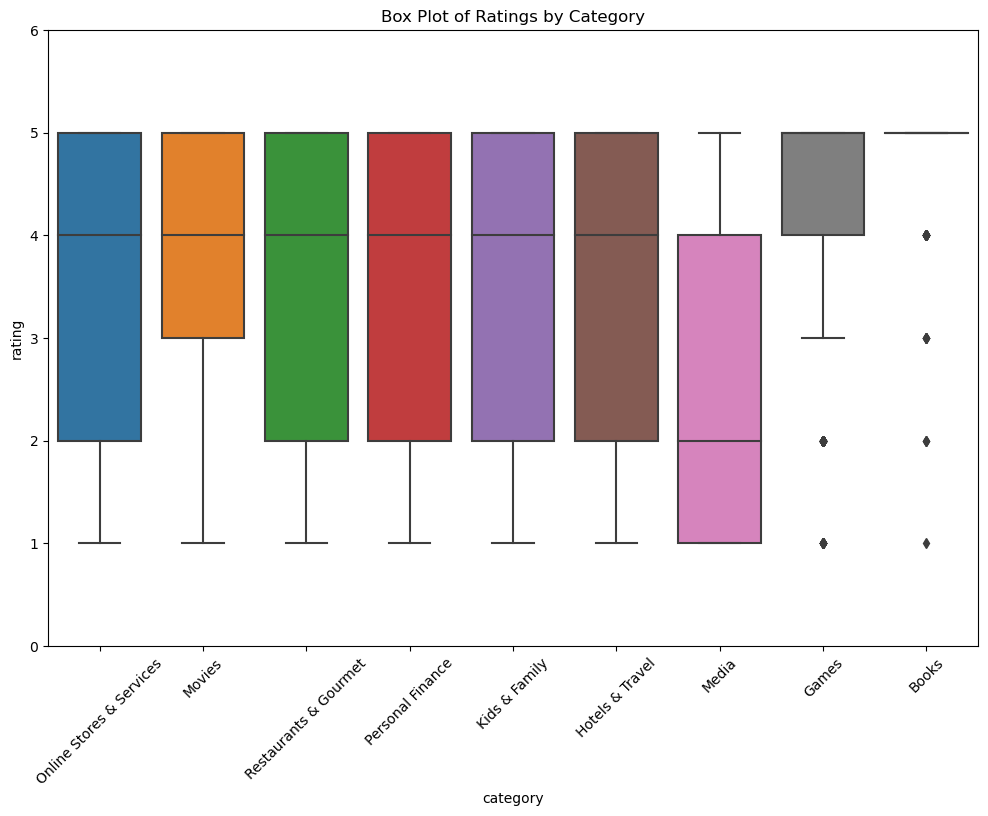

In [11]:
# Boxplot for category vs ratings
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='rating', data=df_cleaned, orient = 'v')
plt.title('Box Plot of Ratings by Category')
plt.ylim(0, 6) # Adjust the y-axis to range from 0 to 5
plt.xticks(rotation=45)
plt.show()


<div style="font-family: Times New Roman;">

<h4 style="text-align:center">Box Plot of Ratings by Category</h4>

<p>The box plot of Ratings by Category reveals that the majority of categories have a median rating of 4, with minimal variation observed within categories such as "Online Stores & Services", "Movies", "Restaurants & Gourmet", "Personal Finance", "Kids & Family", and "Hotels & Travel". For these categories, a minimum of 50% of the ratings received were rated 4 or above. The typical range for most items is between 2 and 5, with the exception of "Movies" which have a minimum value of 3. 

Regarding the categories of "Media," "Games," and "Books," there are notable disparities in the distribution of value among these categories. More precisely, the category "Media" has a maximum value of 4 and a minimum value of 1, but both "Games" and "Books" have a maximum value of around 5. The median values in these three categories exhibit discrepancies when compared to the categories examined earlier. When it comes to ratings of 4 or higher, "Games" receives more than 80% of these ratings, while "Books" gets more than 90% of them. This suggests that there is a notable difference in the distribution of ratings between the two categories.

Noticeably, the outliers that fall beyond the range of the whiskers in the box plots for the "Games" and "Books" categories, depicted as black dots, indicate ratings that are considerably lower than the majority of the data in those categories. The presence of these outliers suggests that although most ratings tend to be concentrated around the median and interquartile range, there are some instances of extreme ratings (specifically, very low ratings in these cases) for certain games or books.

In general, apart from "Media", "Games", and "Books", there is minimal fluctuation in the median ratings among other product categories, with most of them averaging around 4. Nevertheless, the spread and occurrence of extreme values differ between categories, indicating possible disparities in user experiences and rating patterns within each category.
</p>



</div>

##### Q3.4 Data summary

In [12]:
df_summary = df_cleaned.copy()

# Convert 'userId', 'item_id', 'user_city' to object data type
df_summary['userId'] = df_summary['userId'].astype('object')
df_summary['item_id'] = df_summary['item_id'].astype('object')
df_summary['user_city'] = df_summary['user_city'].astype('object')

# Summary of numerical data
numerical_columns = ['rating', 'helpfulness', 'item_price']
numerical_summary = df_summary[numerical_columns].describe().round(2)
print("\nSummary of numerical data:\n")
print(numerical_summary)

print ('------------------------------------------------------------------------------------------------------------')

# Summary of categorical data
categorical_columns = ['userId', 'gender', 'review', 'item', 'category', 'item_id', 'user_city']
categorical_summary = df_summary[categorical_columns].describe(include=['O'])
print("\nSummary of categorical data:\n")
print(categorical_summary)


Summary of numerical data:

        rating  helpfulness  item_price
count  19916.0     19916.00    19916.00
mean       3.7         2.60       82.19
std        1.4         1.75       42.24
min        1.0         0.00       12.00
25%        3.0         0.00       48.25
50%        4.0         4.00       72.00
75%        5.0         4.00      126.50
max        5.0         4.00      149.00
------------------------------------------------------------------------------------------------------------

Summary of categorical data:

        userId gender       review                  item category  item_id  user_city
count    19916  19916        19916                 19916    19916    19916      19916
unique    8562      2        19459                    89        9       89         40
top       6408      M  Great Movie  AOL (America Online)   Movies        0          7
freq        45  10123           14                   939     7048      939        619


<div style="font-family: Times New Roman;">

<h4 style="text-align:center">Brief Summary of Data</h4>

<p>The data contains information on 19916 items, including key fields like rating, helpfulness, gender, and item categories. 

- The ratings range from 1 to 5, with a mean of 3.7 out of 5 stars. 
- The helpfulness scores, which likely indicate how helpful other users found a particular rating, range from 0 to 4 with a mean of 2.6. 
- The items span a wide price range, from $12 to $149, with an average price of $82.19. 
- Moreover, there are 8562 unique users, with 'Male' being the most common. 
- There are 19459 unique reviews, with the most frequently occurring text in the "Review" field being 'Great Movie'.
- The items belong to 9 distinct categories, with 'Movies' being the most popular.
- Based on the information available, it appears that 'AOL (America Online)' is likely one of the most common items (939 times), potentially in the 'Online Stores & Services' category.

</p>
</div>

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

##### Q4.1 Reviews of which the helpfulness is no more than 2

In [24]:
# Identify and remove the outliers of 'helpfulness' no more than 2
df_helpfulness = df_cleaned.drop(df_cleaned[df_cleaned.helpfulness <= 2].index)
print(df_helpfulness.describe())
print ('---------------------------------------------------')
print("Length of the data: ", len(df_helpfulness))




             userId      timestamp        rating   helpfulness       item_id    item_price     user_city
count  13643.000000   13643.000000  13643.000000  13643.000000  13643.000000  13643.000000  13643.000000
mean    5414.111193   57447.037089      3.705563      3.749249     41.743678     82.661817     19.503555
std     3366.457725   38065.329556      1.400103      0.433461     27.281631     42.404370     11.571317
min        0.000000   10100.000000      1.000000      3.000000      0.000000     12.000000      0.000000
25%     1908.000000   20800.000000      3.000000      3.000000     17.000000     48.250000      9.000000
50%     5772.000000   52200.000000      4.000000      4.000000     41.000000     72.000000     19.000000
75%     8335.000000   90899.000000      5.000000      4.000000     65.000000    129.820000     29.000000
max    10806.000000  123199.000000      5.000000      4.000000     88.000000    149.000000     39.000000
---------------------------------------------------
Len

##### Q4.2 Users who rate less than 7 items

In [25]:
# Identify users who rate less than 7 items and remove those users as outliers

## Group the DataFrame by 'userId' and count the number of items rated by each user
        #Size is used to count the number of times an user appear to rate                                                      
userId_count = df_helpfulness.groupby('userId').size() 

#Identify users who rate more than 7 times
user_not_outliers = userId_count[userId_count >= 7].index

#Filter the DataFrame to keep only the users who rate more than 7 times
df_userId_7times = df_helpfulness[df_helpfulness['userId'].isin(user_not_outliers)]

#print (df_userID_7times.describe())
print (df_userId_7times.describe())
print ('---------------------------------------------------')
print("Length of the data: ", len(df_userId_7times))


             userId      timestamp       rating  helpfulness      item_id   item_price    user_city
count   2741.000000    2741.000000  2741.000000  2741.000000  2741.000000  2741.000000  2741.000000
mean    4680.134987   58635.168916     3.705217     3.906968    43.279825    82.882583    19.415542
std     3519.936783   37016.449642     1.347587     0.290530    26.535160    41.913824    11.396787
min        4.000000   10100.000000     1.000000     3.000000     0.000000    12.000000     0.000000
25%     1310.000000   21900.000000     3.000000     4.000000    21.000000    49.000000     9.000000
50%     4811.000000   52800.000000     4.000000     4.000000    42.000000    73.650000    19.000000
75%     7651.000000   90900.000000     5.000000     4.000000    66.000000   129.820000    28.000000
max    10779.000000  123199.000000     5.000000     4.000000    88.000000   149.000000    39.000000
---------------------------------------------------
Length of the data:  2741


##### Q4.3 Items that receives less than 11 ratings


In [26]:
# Group by items and count by rating and filter which ones having ratings >=11

# Group by items and count the number of ratings for each item
item_rating_count = df_userId_7times.groupby('item')['rating'].count()

# Get the items that received 11 or more ratings
item_outliers = item_rating_count[item_rating_count >= 11].index

# Filter the DataFrame to keep only these items
df_item_11ratings = df_userId_7times[df_userId_7times['item'].isin(item_outliers)]

print(df_item_11ratings.describe())
print ('---------------------------------------------------')
print("Length of the data: ", len(df_item_11ratings))



             userId      timestamp       rating  helpfulness      item_id   item_price    user_city
count   2685.000000    2685.000000  2685.000000  2685.000000  2685.000000  2685.000000  2685.000000
mean    4673.237616   58812.687151     3.705028     3.908007    43.478585    83.091650    19.456983
std     3517.893437   37013.726118     1.346240     0.289069    26.630426    42.227558    11.397281
min        4.000000   10100.000000     1.000000     3.000000     0.000000    12.000000     0.000000
25%     1310.000000   22000.000000     3.000000     4.000000    21.000000    49.000000     9.000000
50%     4666.000000   52800.000000     4.000000     4.000000    42.000000    73.650000    19.000000
75%     7651.000000   91000.000000     5.000000     4.000000    67.000000   129.820000    28.000000
max    10779.000000  123199.000000     5.000000     4.000000    88.000000   149.000000    39.000000
---------------------------------------------------
Length of the data:  2685
